## RNA folding energies
Adding data on RNA folding energies
Running this is not necessary to replicate the main resultsd & figures, as processed data is provided.
This notebook is only there to document the operations used.

In [107]:
from importlib import reload
import re
import random
random.seed(1337)
import os
import pickle
import itertools
import functools
import operator

import numpy as np
np.random.seed(1337)
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
import nupack 

### Parse energies for the MPRA data

In [2]:
with open("../Data/data_dict.pkl", 'rb') as handle:
    data_dict = pickle.load(handle)

data_df = data_dict["data"]

In [5]:
with open('../Data/Folding/mpra_input.seq', 'a') as seq_file:
    for seq in data_df["utr"]:
        seq_file.write(seq + "\n")

In [68]:
regex = re.compile(r".\d+.\d+")

structures = []
energies = []
with open('../Data/Folding/mpra.energy', 'r') as fh:
    i = 0
    for line in fh:
        if i % 2 != 0:
            structures.append(line.split(" ")[0])
            energies.append(float(regex.findall(line)[0]))
        i += 1

#### NUPACK

In [96]:
reload(nupack)
nupack.mfe(["CCCCCAGTGTGCCTCGGGGGGGTGCCCCCCCCCCCCCCC"])

[('...............(((((((.....))))))).....', '-14.900')]

In [101]:
mfes = []
for seq in mpra_df["utr"]:
    mfes.append(nupack.mfe([seq])[0][1])

In [105]:
mfes_float = [float(x) for x in mfes]

In [106]:
stats.pearsonr(mpra_df["rl"], mfes_float)

(0.1251746490368716, 1.1814442808100613e-70)

In [108]:
mpra_df["mfe"] = mfes_float

/data/ouga04b/ag_gagneur/home/karollus/.conda/envs/karollus-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


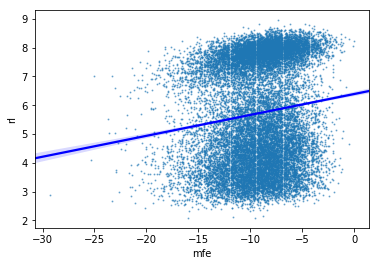

In [109]:
x = sns.regplot(x='mfe', y="rl", data=mpra_df, line_kws={"color":"b"}, scatter_kws={"s": 1, "alpha":0.5}).get_figure()

In [111]:
stats.pearsonr(mpra_df[~mpra_df.utr.str.contains("ATG")]["rl"], 
               mpra_df[~mpra_df.utr.str.contains("ATG")]["mfe"])

(0.417483382169833, 2.351126219813631e-252)

In [113]:
sum(~mpra_df.utr.str.contains("ATG"))

6014

### Parse energies (total, first 50, last 50) for the Doudna data

In [6]:
with open("../Data/doudna_polysome_iso_sub.pkl", 'rb') as handle:
    doudna_df = pickle.load(handle)
doudna_df["library"] = "egfp_unmod_1"
doudna_df = doudna_df.rename(index=str, columns={"rl_mean":"rl"})

In [7]:
with open('../Data/Folding/doudna_input.seq', 'a') as seq_file:
    for seq in doudna_df["utr"]:
        seq_file.write(seq + "\n")

In [67]:
with open('../Data/Folding/doudna_input_first50.seq', 'a') as seq_file:
    for seq in doudna_df["utr"].str[:50]:
        seq_file.write(seq + "\n")
        
with open('../Data/Folding/doudna_input_last50.seq', 'a') as seq_file:
    for seq in doudna_df["utr"].str[-50:]:
        seq_file.write(seq + "\n")